# Data Exploration and Cleaning
In this exercise, I am taking a sample data set to test cleaning, and removing outliers  

**About the data** - [Link](https://www.kaggle.com/kumarajarshi/life-expectancy-who/home) The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website.  

**Aim** - Since this is real-life data, it will be messy and might have a number of outliers or non-normal distributions. We want to clean the data and find extreme values.

### Importing libraries

In [54]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [23]:
# Loading data
data = pd.read_csv('data/LifeExpectancyData.csv')
np.shape(data)

(2938, 22)

In [24]:
# Cursory glance at the data
data.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [25]:
# Checking if all the datatypes have been read correctly
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [26]:
# Checking which columns have missing values
data.count().sort_values(ascending=True)/len(data)

Population                         0.778080
Hepatitis B                        0.811777
GDP                                0.847515
Total expenditure                  0.923077
Alcohol                            0.933969
Income composition of resources    0.943159
Schooling                          0.944520
 thinness 5-9 years                0.988428
 thinness  1-19 years              0.988428
 BMI                               0.988428
Polio                              0.993533
Diphtheria                         0.993533
Adult Mortality                    0.996596
Life expectancy                    0.996596
percentage expenditure             1.000000
under-five deaths                  1.000000
infant deaths                      1.000000
 HIV/AIDS                          1.000000
Status                             1.000000
Year                               1.000000
Measles                            1.000000
Country                            1.000000
dtype: float64

**Observation** - We see that most columns have > 90% of their data.  

### Removing null values

In [27]:
# Find and delete rows where all three columns are null
clean_data = data.dropna(how='all')
# Find and delete rows where both Population and GDP are null
clean_data = clean_data.dropna(how='all',subset=['Population','GDP'])

In [28]:
# New length of data
len(clean_data)

2512

## Detecting outliers

### Univariate method - Box plots

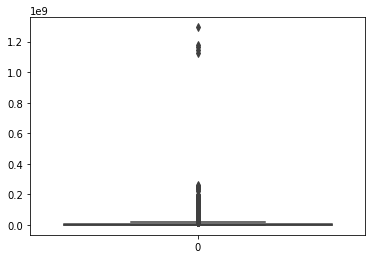

In [41]:
sns.boxplot(data = clean_data['Population'])

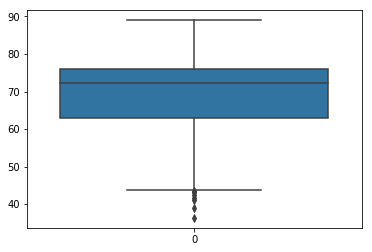

In [38]:
sns.boxplot(data = clean_data['Life expectancy '])

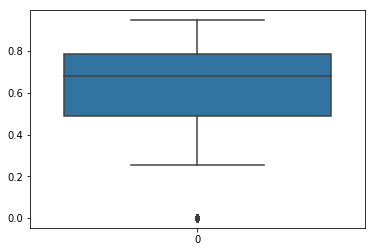

In [36]:
sns.boxplot(data = clean_data['Income composition of resources'])

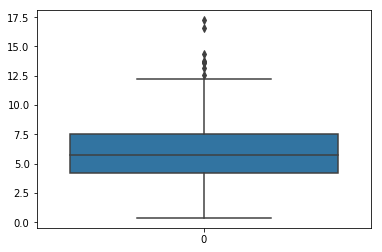

In [39]:
sns.boxplot(data = clean_data['Total expenditure'])

**Observations** -  We plotted some of the variables which had some outliers. Population had the most extreme values of all.


### Univariate and bivariate method - Histogram and Pair Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3f7c3668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a2c1728d0>]], dtype=object)

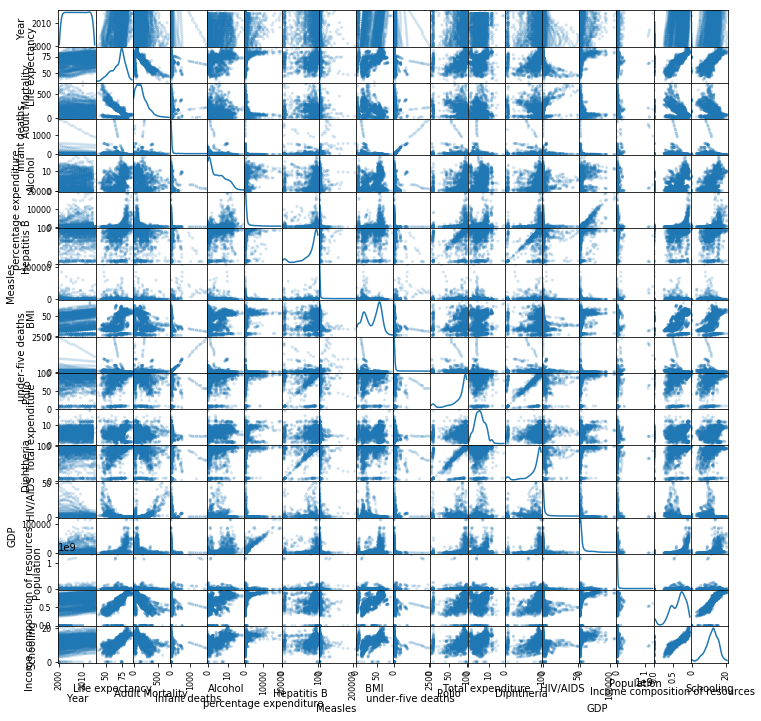

In [52]:
cols_of_interest = ['Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Population', 'Income composition of resources', 'Schooling']
pd.plotting.scatter_matrix(clean_data[cols_of_interest], figsize=(12, 12), alpha=0.2, diagonal='kde')

**Observation** - Looks like there several noticeable patterns in this data -
1. Some variables are skewed - adult mortality, infant deaths, alcohol, percentage expenditure,under-five deaths, etc.
2. Some variables might have linear relationships - life expectancy & income composition of resources, adult mortality & income composition of resources, adult mortality & life expectancy
3. There are potentially some non-linear realtionships between variables too

In order to remove outliers - we might be focusing on skewed variables and randomly distributed ones

In [58]:
# Calculate a z-score by removing rows that have null values
# Since an nan value is obtained otherwise
z = np.abs(stats.zscore(clean_data.dropna()[cols_of_interest]))

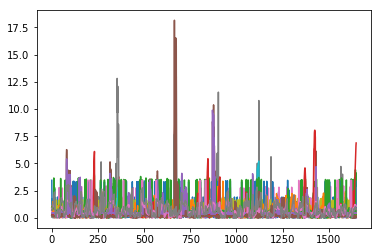

In [64]:
plt.plot(z)

**Observation** - On plotting the z-score, we see that most values lie between 0-4, and there are some extreme z values that may possibly be outliers. Next step we can remove them  

**Reference** - https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba  
**Another Ref** - http://colingorrie.github.io/outlier-detection.html